# Problem Statement: 
## Analyzing the Adoption and Distribution of Electric Vehicles (EVs) Using Data Analytics

This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

The adoption of electric vehicles (EVs) has been steadily increasing as governments, businesses, and individuals transition toward sustainable transportation. However, understanding the distribution, range, and eligibility for clean energy incentives remains a critical aspect for policymakers, businesses, and researchers.

This dataset provides insights into EV adoption across Washington State. By analyzing this data, we can uncover key trends, such as:
- Trends in Electric Vehicle Adoption over different model years.
- Comparison of Electric Range across manufacturers.
- Vehicle Type Distribution (Battery Electric Vehicles vs. Plug-in Hybrid Vehicles).

### Objective:
To leverage data analytics to identify key trends, adoption patterns, and eligibility insights for electric vehicles, aiding stakeholders in strategic planning and sustainable growth.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
ev = pd.read_csv('Electric_Vehicle_Population_Data.csv')
ev.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA5L,King,Seattle,WA,98133.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,46.0,249903111,POINT (-122.35029 47.71871),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,5UX43EU08R,King,Seattle,WA,98125.0,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,0,46.0,264762606,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
2,5UX43EU06R,King,Seattle,WA,98102.0,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,0,43.0,275506031,POINT (-122.32427 47.63433),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EA1J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,117023581,POINT (-122.22901 47.72201),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,1G1RA6E43C,Thurston,Olympia,WA,98501.0,2012,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35,0,35.0,158415498,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10


In [3]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220225 entries, 0 to 220224
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         220225 non-null  object 
 1   County                                             220222 non-null  object 
 2   City                                               220222 non-null  object 
 3   State                                              220225 non-null  object 
 4   Postal Code                                        220222 non-null  float64
 5   Model Year                                         220225 non-null  int64  
 6   Make                                               220225 non-null  object 
 7   Model                                              220225 non-null  object 
 8   Electric Vehicle Type                              220225 non-null  object

In [4]:
ev.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 463
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [5]:
ev[ev['Legislative District'].isnull()]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
22629,7FCTGAAA2N,Monterey,Seaside,CA,93955.0,2022,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,256961141,POINT (-121.8535 36.60404),NON WASHINGTON STATE ELECTRIC UTILITY,6.053014e+09
38010,5YJ3E1EA4K,Sarasota,Sarasota,FL,34242.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,300293815,POINT (-82.559 27.27335),NON WASHINGTON STATE ELECTRIC UTILITY,1.211500e+10
79780,JTDKN3DP4F,Wasco,The Dalles,OR,97058.0,2015,TOYOTA,PRIUS PLUG-IN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6,0,NaN,189131400,POINT (-121.18329 45.60172),NON WASHINGTON STATE ELECTRIC UTILITY,4.106597e+10
94063,KMUKEDTB9P,Orange,Midway City,CA,92655.0,2023,GENESIS,GV60,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,220657608,POINT (-117.98647 33.74469),NON WASHINGTON STATE ELECTRIC UTILITY,6.059100e+09
101454,5YJ3E1EBXK,Lee,Smiths Station,AL,36877.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,225833863,POINT (-85.08963 32.54086),NON WASHINGTON STATE ELECTRIC UTILITY,1.081042e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219650,7SAYGDEE6P,San Diego,El Cajon,CA,92021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,257727032,POINT (-116.93349 32.80982),NON WASHINGTON STATE ELECTRIC UTILITY,6.073017e+09
219891,2C4RC1L71N,New London,Gales Ferry,CT,6335.0,2022,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,NaN,261560246,POINT (-72.08157 41.42621),NON WASHINGTON STATE ELECTRIC UTILITY,9.011701e+09
219918,JTMFB3FV7M,Fairfax,Springfield,VA,22152.0,2021,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,258262609,POINT (-77.23582 38.78379),NON WASHINGTON STATE ELECTRIC UTILITY,5.105943e+10
220035,5YJYGDEE9M,Lake,Highland Park,IL,60035.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,NaN,211047854,POINT (-87.7992 42.18569),NON WASHINGTON STATE ELECTRIC UTILITY,1.709787e+10


#### Dealing with Null Values

- Legislative District has 463 null values which cannot be replaced with any of the strategic mean, median, mode value as the specific section of Washington State that where the vehicle's owner resides in is unknown to us. So we'll drop the null values.

In [6]:
ev1 = ev.copy()

In [7]:
ev1.dropna(subset= 'Legislative District', inplace= True)

In [8]:
ev1.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     6
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [9]:
ev1.shape

(219762, 17)

#### Observation

- As we removed all the null values from the data, now we will do a univariate analysis on each column
- We will also chcek the data type of each column if the values are in the correct data type or not.
- Columns which are not necessary for the analysis and does not give any output can be dropped from the dataset.

In [10]:
ev1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219762 entries, 0 to 220224
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         219762 non-null  object 
 1   County                                             219762 non-null  object 
 2   City                                               219762 non-null  object 
 3   State                                              219762 non-null  object 
 4   Postal Code                                        219762 non-null  float64
 5   Model Year                                         219762 non-null  int64  
 6   Make                                               219762 non-null  object 
 7   Model                                              219762 non-null  object 
 8   Electric Vehicle Type                              219762 non-null  object

In [11]:
ev1['2020 Census Tract'].value_counts()

5.303303e+10    2631
5.303303e+10    1171
5.303303e+10     931
5.303301e+10     864
5.306701e+10     820
                ... 
5.306300e+10       3
5.303995e+10       3
5.307700e+10       2
5.303301e+10       2
5.300396e+10       2
Name: 2020 Census Tract, Length: 1769, dtype: int64

#### Observation

- The data consist of only one state that is WA and so as it is known to us, we'll just drop the State column from the dataset.

- Postal Code datatype is in float and so we'll convert it in integer.

- Clean Alternative Fuel Vehicle (CAFV) Eligibility has almost 127000 values, where the eligibility is not know due to battery range was not been researched. We need to try to check if we can find the eligibility of battery range by any means.

- Electric Range column also has same 127000 values as 0, due to which the eligibility is not known. We try to check is we can replace the 0 values with some ither value or not.

- Base MSRP has 216482 values as 0. This column will not help us in our analysis and filling up and replacing the value with some other value will not give us the accuracy. We'll take a decision if we need to drop this column as being highly skewed.

- Looking at the values of the Electric Utility column, resembles that the values does not have much relevance to the data analysis. So we'll consider the columns to be dropped instead.


- 2020 Census Tract also known as Geographic Identifier, is a combination of the state, county, and census tract codes as assigned by the United States Census Bureau in the 2020 census. As we already have a Vehicle location column available with us as Geo Codes available within, so we'll drop this column as well. 

In [12]:
# Lets drop the columns which are not requeired in the dataset.
ev1.drop(columns=['State', 'Electric Utility', '2020 Census Tract'], inplace=True)

In [13]:
ev1.head()

,VIN (1-10),County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,5YJ3E1EA5L,King,Seattle,98133.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,46.0,249903111,POINT (-122.35029 47.71871)
1,5UX43EU08R,King,Seattle,98125.0,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,0,46.0,264762606,POINT (-122.30253 47.72656)
2,5UX43EU06R,King,Seattle,98102.0,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,0,43.0,275506031,POINT (-122.32427 47.63433)
3,5YJ3E1EA1J,King,Kirkland,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,117023581,POINT (-122.22901 47.72201)
4,1G1RA6E43C,Thurston,Olympia,98501.0,2012,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35,0,35.0,158415498,POINT (-122.89166 47.03956)


In [14]:
# Lets change the dtype of the Postal Code column
ev1['Postal Code'] = ev1['Postal Code'].astype(int)

In [15]:
ev1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219762 entries, 0 to 220224
Data columns (total 14 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         219762 non-null  object 
 1   County                                             219762 non-null  object 
 2   City                                               219762 non-null  object 
 3   Postal Code                                        219762 non-null  int64  
 4   Model Year                                         219762 non-null  int64  
 5   Make                                               219762 non-null  object 
 6   Model                                              219762 non-null  object 
 7   Electric Vehicle Type                              219762 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  219762 non-null  object

In [16]:
# Dropping the Base MSRP column as majority value is 0 and illing with mean, median, mode will give a meaningful insight.
ev1.drop(columns=['Base MSRP'], inplace=True)

In [17]:
ev1.head()

,VIN (1-10),County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location
0,5YJ3E1EA5L,King,Seattle,98133,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,46.0,249903111,POINT (-122.35029 47.71871)
1,5UX43EU08R,King,Seattle,98125,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,46.0,264762606,POINT (-122.30253 47.72656)
2,5UX43EU06R,King,Seattle,98102,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,43.0,275506031,POINT (-122.32427 47.63433)
3,5YJ3E1EA1J,King,Kirkland,98034,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,1.0,117023581,POINT (-122.22901 47.72201)
4,1G1RA6E43C,Thurston,Olympia,98501,2012,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35,35.0,158415498,POINT (-122.89166 47.03956)


In [18]:
ev1['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Eligibility unknown as battery range has not been researched    127086
Clean Alternative Fuel Vehicle Eligible                          70855
Not eligible due to low battery range                            21821
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [19]:
ev1['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            173884
Plug-in Hybrid Electric Vehicle (PHEV)     45878
Name: Electric Vehicle Type, dtype: int64

In [20]:
ev1[ev1['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Eligibility unknown as battery range has not been researched']

,VIN (1-10),County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location
5,1V2CMPE88P,Yakima,Selah,98942,2023,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,15.0,236596720,POINT (-120.53145 46.65405)
6,KNDAFFS57R,Yakima,Yakima,98908,2024,KIA,EV9,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,14.0,268712349,POINT (-120.60272 46.59656)
9,KNDCC3LG4N,Yakima,Yakima,98908,2022,KIA,NIRO,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,15.0,183177326,POINT (-120.60272 46.59656)
10,7FCTGBAA7R,Thurston,Tenino,98589,2024,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,20.0,260421878,POINT (-122.85135 46.85752)
28,7FCTGAAAXP,Kitsap,Bremerton,98310,2023,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,23.0,251618097,POINT (-122.61136 47.5752)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220211,KNDC4DLC0P,Snohomish,Everett,98208,2023,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,44.0,233932926,POINT (-122.18637 47.89251)
220215,7SAYGDED2P,King,Bellevue,98027,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,41.0,261227263,POINT (-122.03439 47.5301)
220217,7SAYGDEE9R,Snohomish,Stanwood,98292,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,10.0,270703268,POINT (-122.37265 48.24159)
220219,7SAYGDEF7P,Snohomish,Marysville,98270,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,44.0,249943830,POINT (-122.1769 48.06114)


In [21]:
ev1.groupby('Electric Vehicle Type')['Electric Range'].value_counts()

Electric Vehicle Type                   Electric Range
Battery Electric Vehicle (BEV)          0                 127086
                                        215                 6318
                                        238                 4010
                                        220                 3982
                                        84                  3586
                                                           ...  
Plug-in Hybrid Electric Vehicle (PHEV)  46                     6
                                        55                     5
                                        11                     4
                                        51                     4
                                        100                    3
Name: Electric Range, Length: 115, dtype: int64

In [22]:
ev1['Electric Range'].value_counts(normalize=True)*100

0      57.828924
215     2.874928
32      2.338894
25      2.051310
21      1.986695
         ...    
51      0.001820
288     0.001820
95      0.001365
57      0.000910
74      0.000910
Name: Electric Range, Length: 109, dtype: float64

In [23]:
Zero_Range = ev1[ev1['Electric Range'] == 0]

In [24]:
result = Zero_Range.groupby('Electric Vehicle Type')['Make'].value_counts()
print(result)

Electric Vehicle Type           Make                  
Battery Electric Vehicle (BEV)  TESLA                     69922
                                FORD                       7688
                                CHEVROLET                  6377
                                RIVIAN                     6144
                                KIA                        5943
                                HYUNDAI                    5253
                                NISSAN                     4739
                                VOLKSWAGEN                 4706
                                BMW                        2908
                                VOLVO                      1760
                                SUBARU                     1669
                                AUDI                       1633
                                MERCEDES-BENZ              1564
                                TOYOTA                     1122
                                POLESTAR         

#### Observation

If you clearly see the above code, we grouped the Electric Vehicle type and checked the value counts of each vehicle type. This shows that Battery Electric Vehicle is the only Vehicle type that has 127086 values as zero. Almost 57% of the values are 0. 

Tesla has the most number of 0 values for Electric Range. Out of that 57% of zero values, 55% of them are the Make of Tesla. 

There are total 173884 BEV. Out of those 173884 BEV, 127086 BEV has Electric Range as 0 as it was never measured. So even if we remove these rows with 0 value in Electric Range we still have sufficient data to analyse. We can replace the 0 value with the median value of the entire range of Electric Range column but there could be high possibility that the values may misleading and will hamper the quality of the data as well as analysis. So dropping the rows with 0 as Electric Range.


In [25]:
ev1 = ev1[ev1['Electric Range'] != 0]
ev1.reset_index(drop=True, inplace=True)

In [26]:
ev1['Electric Range'].value_counts()

215    6318
32     5140
25     4508
21     4366
238    4010
       ... 
51        4
288       4
95        3
57        2
74        2
Name: Electric Range, Length: 108, dtype: int64

In [27]:
ev1.head()

,VIN (1-10),County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location
0,5YJ3E1EA5L,King,Seattle,98133,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,46.0,249903111,POINT (-122.35029 47.71871)
1,5UX43EU08R,King,Seattle,98125,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,46.0,264762606,POINT (-122.30253 47.72656)
2,5UX43EU06R,King,Seattle,98102,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,43.0,275506031,POINT (-122.32427 47.63433)
3,5YJ3E1EA1J,King,Kirkland,98034,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,1.0,117023581,POINT (-122.22901 47.72201)
4,1G1RA6E43C,Thurston,Olympia,98501,2012,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35,35.0,158415498,POINT (-122.89166 47.03956)


In [28]:
ev1.shape

(92676, 13)

In [29]:
ev1.describe()

,Postal Code,Model Year,Electric Range,Legislative District,DOL Vehicle ID
count,92676.000000,92676.00000,92676.000000,92676.000000,9.267600e+04
mean,98293.332869,2018.91494,115.509388,28.506798,2.209464e+08
std,321.646873,3.27711,98.815377,14.649595,9.879240e+07
min,98001.000000,1999.00000,6.000000,1.000000,4.385000e+03
25%,98058.000000,2017.00000,30.000000,17.000000,1.522766e+08
50%,98168.000000,2019.00000,73.000000,32.000000,2.285357e+08
75%,98405.000000,2021.00000,215.000000,41.000000,2.658103e+08
max,99403.000000,2025.00000,337.000000,49.000000,4.792548e+08


#### Observation

- Mean of Electric Range is 115.5 but the Std is 98.8 which is quite high. Could be possibilites that there are some outliers in the column. We'll check by using the boxplot or histogram.

- We can perform feature engineering on the column Electric Range with Low Range, Medium Range and High Range.

In [30]:
# Let's start with feature engineering

def categorize_range(x):
    if x < 50:
        return 'Low Range'
    elif x < 175:
        return 'Medium Range'
    else:
        return 'High Range'
    
ev1['Range Category'] = ev1['Electric Range'].apply(categorize_range)
        

In [31]:
ev1.head()

,VIN (1-10),County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Range Category
0,5YJ3E1EA5L,King,Seattle,98133,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,46.0,249903111,POINT (-122.35029 47.71871),High Range
1,5UX43EU08R,King,Seattle,98125,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,46.0,264762606,POINT (-122.30253 47.72656),Low Range
2,5UX43EU06R,King,Seattle,98102,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,43.0,275506031,POINT (-122.32427 47.63433),Low Range
3,5YJ3E1EA1J,King,Kirkland,98034,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,1.0,117023581,POINT (-122.22901 47.72201),High Range
4,1G1RA6E43C,Thurston,Olympia,98501,2012,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35,35.0,158415498,POINT (-122.89166 47.03956),Low Range


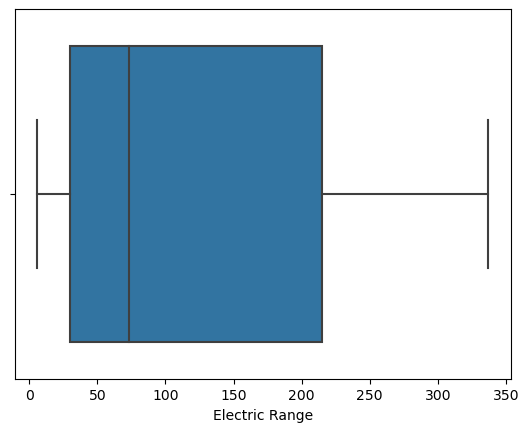

In [32]:
sns.boxplot(x=ev1['Electric Range'])
plt.show()

<Axes: xlabel='Electric Range', ylabel='Count'>

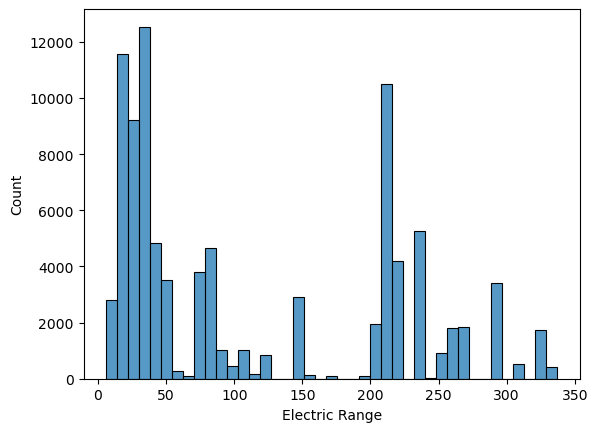

In [33]:
sns.histplot(x=ev1['Electric Range'])

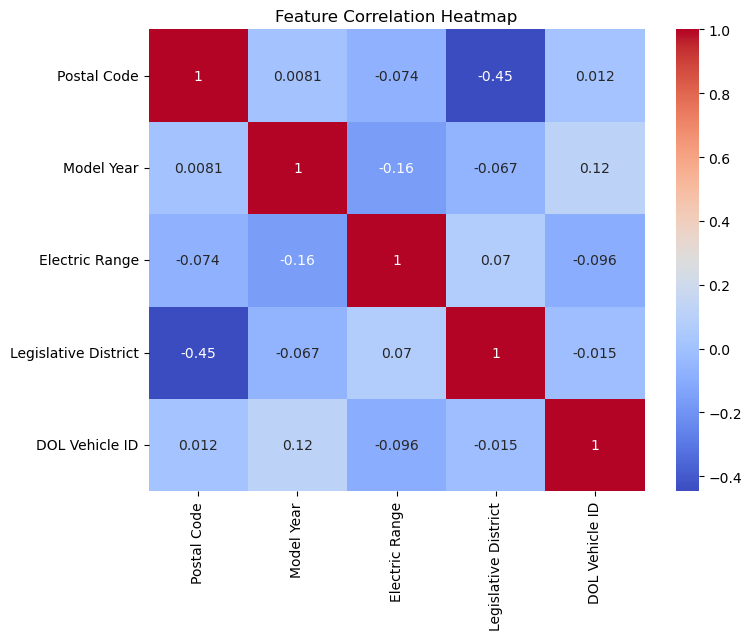

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(ev1.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [35]:
# Let's save the file to further visualise the data on Tableau
ev1.to_excel('Cleaned Electric Vehicle Population Data.xlsx', index= False)
print('file saved successfully')

file saved successfully
